Dataset: Widerface <br>


In [39]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from src.utils.draw_utils import draw_bbox
from src.detection.detector import detector_wrapper

In [40]:
ROOT_DIR = os.path.abspath('dataset/test/detection/WiderFace')
IMAGES_DIR = os.path.join(ROOT_DIR, 'images/valid')
ANNOTATIONS_DIR = os.path.join(ROOT_DIR, 'wider_face_split')
VALID_ANNOTATIONS_PATH = os.path.join(ANNOTATIONS_DIR, 'wider_face_val_bbx_gt.txt')

In [41]:
FONT = cv2.FONT_HERSHEY_SIMPLEX
FONT_SCALE = 0.5
FONT_COLOR = (255, 0, 0)
LINETYPE = 2

def draw_bounding_boxes(image, bboxes, color=(0, 255, 0), thickness=4):
    for bbox in bboxes:
        image = draw_bounding_box(image, bbox, color, thickness)
    return image

def draw_bounding_box(image, bbox, color=(0, 0, 255), thickness=4):
    top_left_x, top_left_y, w, h = bbox
    image = cv2.line(
        image,
        (top_left_x, top_left_y),
        (top_left_x + w // 4, top_left_y),
        color,
        thickness,
    )

    image = cv2.line(
        image,
        (top_left_x, top_left_y),
        (top_left_x, top_left_y + h // 4),
        color,
        thickness,
    )

    image = cv2.line(
        image,
        (top_left_x + w, top_left_y),
        (top_left_x + w - w // 4, top_left_y),
        color,
        thickness,
    )

    image = cv2.line(
        image,
        (top_left_x + w, top_left_y),
        (top_left_x + w, top_left_y + h // 4),
        color,
        thickness,
    )

    image = cv2.line(
        image,
        (top_left_x, top_left_y + h),
        (top_left_x + w // 4, top_left_y + h),
        color,
        thickness,
    )

    image = cv2.line(
        image,
        (top_left_x, top_left_y + h),
        (top_left_x, top_left_y + h - h // 4),
        color,
        thickness,
    )

    image = cv2.line(
        image,
        (top_left_x + w, top_left_y + h),
        (top_left_x + w - w // 4, top_left_y + h),
        color,
        thickness,
    )

    image = cv2.line(
        image,
        (top_left_x + w, top_left_y + h),
        (top_left_x + w, top_left_y + h - h // 4),
        color,
        thickness,
    )

    return image

In [42]:
with open(VALID_ANNOTATIONS_PATH, "r") as f:
    file = f.readlines()

print(len(file))

46160


In [43]:
i=0
data = {
    'filename': [],
    'num_detections': [],
    'detection_boxes': [],
}
while i < len(file):
    filename, num_detections = file[i].strip(), int(file[i+1].strip())
    bboxes = []
    for j in range(num_detections):
        # x1, y1, w, h, blur, expression, illumination, invalid, occlusion, pose
        bbox  = file[j+i+2].strip().split(' ')
        bboxes.append([int(bbox[x]) for x in range(4)])
    
    data['detection_boxes'].append(bboxes)
    data['filename'].append(filename)
    data['num_detections'].append(num_detections)

    i += num_detections + 2

print(len(data['filename']), len(data['num_detections']), len(data['detection_boxes']))



3226 3226 3226


In [44]:
data = pd.DataFrame(data, columns=['filename', 'num_detections', 'detection_boxes'])
data['path'] = data['filename'].apply(lambda x: os.path.join(IMAGES_DIR, x))
data.head()

,filename,num_detections,detection_boxes,path
0,0--Parade/0_Parade_marchingband_1_465.jpg,126,"[[345, 211, 4, 4], [331, 126, 3, 3], [250, 126...",/home/luke/Desktop/Projects/Face-Recognition-S...
1,0--Parade/0_Parade_Parade_0_628.jpg,29,"[[26, 299, 10, 16], [25, 329, 7, 11], [84, 341...",/home/luke/Desktop/Projects/Face-Recognition-S...
2,0--Parade/0_Parade_marchingband_1_765.jpg,132,"[[311, 131, 8, 9], [299, 143, 10, 11], [284, 1...",/home/luke/Desktop/Projects/Face-Recognition-S...
3,0--Parade/0_Parade_Parade_0_194.jpg,5,"[[111, 425, 122, 127], [209, 347, 70, 103], [3...",/home/luke/Desktop/Projects/Face-Recognition-S...
4,0--Parade/0_Parade_marchingband_1_379.jpg,26,"[[281, 303, 20, 36], [260, 324, 16, 21], [896,...",/home/luke/Desktop/Projects/Face-Recognition-S...


In [123]:
data['category'] = data['filename'].apply(lambda x: x.split('/')[0])
categories = [
    '1--Handshaking',
    '4--Dancing',
    '9--Press_Conference',
    '16--Award_Ceremony',
    '19--Couple',
    '31--Waiter_Waitress'
    '51--Dresses',
]
df = data[data['category'].isin(categories)]
df = df.reset_index()
print(data.shape, df.shape)
df.head()

(3226, 5) (231, 6)


,index,filename,num_detections,detection_boxes,path,category
0,115,1--Handshaking/1_Handshaking_Handshaking_1_664...,5,"[[857, 21, 42, 62], [651, 107, 15, 22], [681, ...",/home/luke/Desktop/Projects/Face-Recognition-S...,1--Handshaking
1,116,1--Handshaking/1_Handshaking_Handshaking_1_762...,2,"[[235, 211, 315, 417], [615, 438, 185, 214]]",/home/luke/Desktop/Projects/Face-Recognition-S...,1--Handshaking
2,117,1--Handshaking/1_Handshaking_Handshaking_1_766...,1,"[[390, 90, 260, 374]]",/home/luke/Desktop/Projects/Face-Recognition-S...,1--Handshaking
3,118,1--Handshaking/1_Handshaking_Handshaking_1_134...,2,"[[320, 66, 70, 142], [698, 58, 70, 156]]",/home/luke/Desktop/Projects/Face-Recognition-S...,1--Handshaking
4,119,1--Handshaking/1_Handshaking_Handshaking_1_362...,1,"[[104, 10, 482, 508]]",/home/luke/Desktop/Projects/Face-Recognition-S...,1--Handshaking


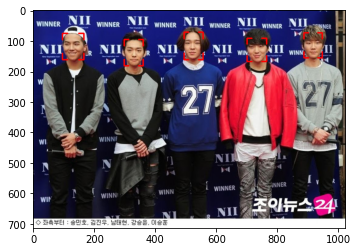

In [156]:
idx = np.random.randint(0, len(df))
path = df.iloc[idx]['path']
img = cv2.imread(path)
plt.imshow(img)
plt.imshow(draw_bounding_boxes(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), df['detection_boxes'][idx], color=(255, 0, 0)))
detections, landmarks = detector.detect(cv2.imread(path))

[(301, 115, 62, 62), (487, 94, 63, 62), (88, 88, 74, 75), (888, 94, 63, 62), (693, 96, 75, 75), (855, 211, 129, 129)]


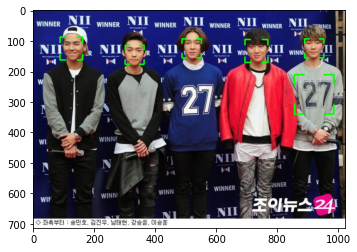

In [157]:
print(detections)
plt.imshow(draw_bounding_boxes(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB), detections))

In [135]:
def get_iou(box1, box2, epsilon=1e-5):
    """ Given two boxes `a` and `b` defined as a list of four numbers:
            [x1,y1,x2,y2]
        where:
            x1,y1 represent the upper left corner
            x2,y2 represent the lower right corner
        It returns the Intersect of Union score for these two boxes.

    Args:
        a:          (list of 4 numbers) [x1,y1,x2,y2]
        b:          (list of 4 numbers) [x1,y1,x2,y2]
        epsilon:    (float) Small value to prevent division by zero

    Returns:
        (float) The Intersect of Union score.
    """
    a = [
        box1[0], 
        box1[1],
        box1[0] + box1[2],
        box1[1] + box1[3],

    ]
    b = [
        box2[0],
        box2[1],
        box2[0] + box2[2], 
        box2[1] + box2[3],

    ]
    # COORDINATES OF THE INTERSECTION BOX
    x1 = max(a[0], b[0])
    y1 = max(a[1], b[1])
    x2 = min(a[2], b[2])
    y2 = min(a[3], b[3])

    # AREA OF OVERLAP - Area where the boxes intersect
    width = (x2 - x1)
    height = (y2 - y1)
    # handle case where there is NO overlap
    if (width<0) or (height <0):
        return 0.0
    area_overlap = width * height

    # COMBINED AREA
    area_a = (a[2] - a[0]) * (a[3] - a[1])
    area_b = (b[2] - b[0]) * (b[3] - b[1])
    area_combined = area_a + area_b - area_overlap

    # RATIO OF AREA OF OVERLAP OVER COMBINED AREA
    iou = area_overlap / (area_combined+epsilon)
    return iou

In [158]:
ious = []
final_ious = []
for gt in df['detection_boxes'][idx]:
    iou = -9999
    pred = [0, 0, 0, 0]
    iou = get_iou(gt, pred)
    for pred in detections:
        a = get_iou(gt, pred)
        if a >= iou:
            iou = a
     
    ious.append(iou)

print(len(df['detection_boxes'][idx]), len(detections), len(ious))
print(ious)
print(np.array(ious).mean())

5 6 5
[0.7304816022577302, 0.662921347113227, 0.5773195866689066, 0.7835402129169525, 0.6875717004061727]
0.6883668898725979


In [152]:
from tqdm import tqdm
score = []
detector = detector_wrapper("HaarCascade")

for idx, row in tqdm(df.iterrows(), total=len(df)):
    path = df.iloc[idx]['path']
    detections, _ = detector.detect(cv2.imread(path))

    for gt in df['detection_boxes'][idx]:
        iou = -9999
        pred = [0, 0, 0, 0]
        iou = get_iou(gt, pred)
        for pred in detections:
            a = get_iou(gt, pred)
            if a >= iou:
                iou = a
        
        ious.append(iou)
    
    score.append(np.mean(ious))
print(np.mean(score))

100%|██████████| 231/231 [00:36<00:00,  6.37it/s]

0.20991091670112863


In [153]:
from tqdm import tqdm
score = []
detector = detector_wrapper("Mediapipe")

for idx, row in tqdm(df.iterrows(), total=len(df)):
    path = df.iloc[idx]['path']
    detections, _ = detector.detect(cv2.imread(path))

    for gt in df['detection_boxes'][idx]:
        iou = -9999
        pred = [0, 0, 0, 0]
        iou = get_iou(gt, pred)
        for pred in detections:
            a = get_iou(gt, pred)
            if a >= iou:
                iou = a
        
        ious.append(iou)
    
    score.append(np.mean(ious))
print(np.mean(score))

Initializing mediapipe face detector


100%|██████████| 231/231 [00:05<00:00, 44.75it/s]

0.21271482811981218


In [154]:
from tqdm import tqdm
score = []
detector = detector_wrapper("HOG")

for idx, row in tqdm(df.iterrows(), total=len(df)):
    path = df.iloc[idx]['path']
    detections, _ = detector.detect(cv2.imread(path))

    for gt in df['detection_boxes'][idx]:
        iou = -9999
        pred = [0, 0, 0, 0]
        iou = get_iou(gt, pred)
        for pred in detections:
            a = get_iou(gt, pred)
            if a >= iou:
                iou = a
        
        ious.append(iou)
    
    score.append(np.mean(ious))
print(np.mean(score))

100%|██████████| 231/231 [01:48<00:00,  2.13it/s]

0.21520990708643886


In [ ]:
np